CODED Solution to Graded Quiz

PREPARED BY ADESOBA ADEWALE OLAMIDE

This file is Adesoba Olamide solution for the Graded Quiz of HAMOYE EXternship. It will walk you through my analysis of the tasks.

In [1]:
# loading all libraries required for this tasks
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

Exploratory data analysis The first step in any analysis is to first understand the data. Let's take a look at each of the datasets provided.

Examining THE DATA SET

In [2]:
## Loading the  required  datasets and assigning a variable name
FUEL = pd.read_csv(r'C:\Users\OLAMIDE\Desktop\HAMOYE\fuel_ferc1.csv')
FUEL.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
FUEL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [12]:
num_null = pd.DataFrame(FUEL.isnull().sum()).reset_index()
num_null.columns=("column_name","num_null")
num_null = num_null.set_index('column_name')
num_null

,num_null
column_name,
record_id,0
utility_id_ferc1,0
report_year,0
plant_name_ferc1,0
fuel_type_code_pudl,0
fuel_unit,180
fuel_qty_burned,0
fuel_mmbtu_per_unit,0
fuel_cost_per_unit_burned,0


the fuel_unit contains 180 null values, and was the only colunm where such exist

In [16]:
100 * num_null.num_null['fuel_unit']/len(FUEL.record_id)

0.6096941367747181

the percentage of the fuel_unit that contains null value out of the total row is 0.610%

The correction to reflect the unit instead of the null value

In [14]:
for i in FUEL['fuel_type_code_pudl']:
    if i == 'oil':
        FUEL['fuel_unit'] = 'bbl'
    elif i == 'gas':
        FUEL['fuel_unit'] = 'mcf'
    elif i == 'nuclear':
        FUEL['fuel_unit'] = 'kgu'
    elif i == 'coal':
        FUEL['fuel_unit'] = 'ton'
    

In [15]:
FUEL.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [18]:
FUEL.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


the std and 75th percentile of the fuel_mmbtu_per_unit are 10.6 and 17.06 respectively

In [18]:
FUEL_TYPE = pd.DataFrame(FUEL.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].mean()).reset_index()
FUEL_TYPE.columns=("FUEL_TYPE","AVERAGE_FUEL_COST")
FUEL_TYPE = FUEL_TYPE.set_index('FUEL_TYPE')
FUEL_TYPE

,AVERAGE_FUEL_COST
FUEL_TYPE,
coal,67.421830
gas,13.659397
nuclear,4955.157002
oil,168.877086
other,18.253856
waste,19.518122


In [20]:
FUEL_TYPE.AVERAGE_FUEL_COST['coal']

67.42182999882996

In [47]:
FUEL.corr(method ='pearson')

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


<AxesSubplot:>

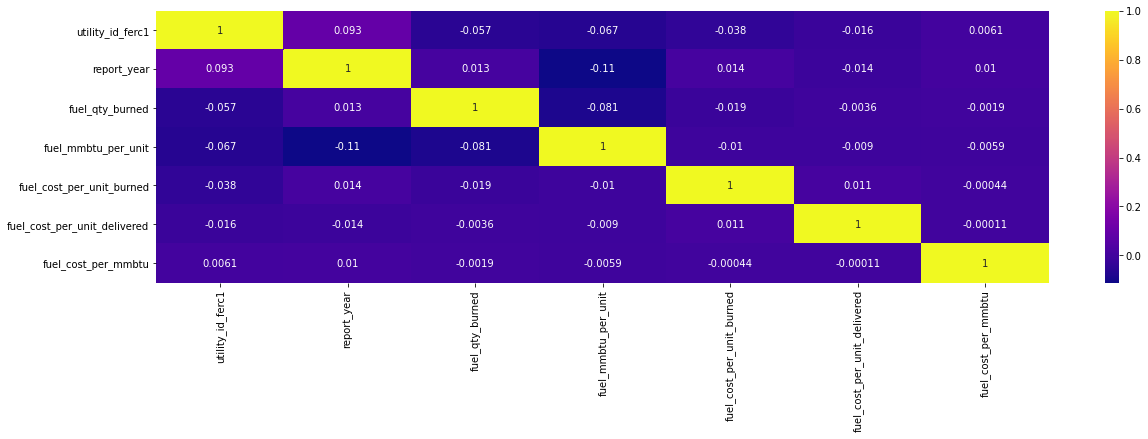

In [22]:
plt.figure(figsize=(20,5))
sns.heatmap(FUEL.corr(),cmap='plasma',annot=True )

In [37]:
report_year = pd.DataFrame(FUEL.groupby(['report_year'])['fuel_cost_per_unit_delivered'].mean()).reset_index()
report_year.columns=("report_year","average_fuel_cost_delivered")
report_year

,report_year,average_fuel_cost_delivered
0,1994,63.636060
1,1995,32.735269
2,1996,9196.705948
3,1997,11140.197239
4,1998,287.154420
5,1999,25.551627
6,2000,985.362877
7,2001,60.050396
8,2002,47.594361
9,2003,55.663493


In [39]:
max = max(report_year.average_fuel_cost_delivered)
max

11140.19723948813

In [42]:
report_year.loc[report_year.average_fuel_cost_delivered == max]

,report_year,average_fuel_cost_delivered
3,1997,11140.197239


1997 was the year they recorded the highest average_fuel_cost_delivered

In [52]:
pd.DataFrame(FUEL.fuel_qty_burned).kurtosis()

fuel_qty_burned    651.36945
dtype: float64

In [53]:
pd.DataFrame(FUEL.fuel_qty_burned).skew()

fuel_qty_burned    15.851495
dtype: float64

In [43]:
k = pd.DataFrame(FUEL.groupby(['report_year','fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()).unstack()['fuel_cost_per_unit_burned']
k

fuel_type_code_pudl,coal,gas,nuclear,oil,other,waste
report_year,,,,,,
1994,14984.572,10792.496,227983.354,9362.194,116.737,52.762
1995,14571.785,9087.905,384152.639,17858.281,183.577,-192.699
1996,12694.803,1467.390,66657.887,5357.028,160.075,88.092
1997,43742.178,1518.471,112593.911,5387.536,153.923,137.433
1998,11902.597,7475.596,117788.269,2608.657,225.428,238.109
1999,16303.468,16767.895,62915.808,29654.510,271.579,143.025
2000,100428.831,10024.878,112375.382,104055.470,100.014,-489.141
2001,15109.012,10360.348,59292.078,95315.421,71.283,217.499
2002,9171.164,3584.279,59958.884,48956.627,-4.257,254.438


In [46]:
B = k.loc[[1994,1998],['coal']]
B

fuel_type_code_pudl,coal
report_year,
1994,14984.572
1998,11902.597


In [50]:
PERCENTAGE_CHANGE = ((B.coal[1998] -  B.coal[1994]) / B.coal[1994])*100
PERCENTAGE_CHANGE

-20.56765451826049